# COVID19 Vaccination Analysis

Team Members - Akanksha Tetwar,Sanika,Shravya

## **Introduction**

To bring this pandemic to an end, a large share of the world needs to be immune to the virus. The safest way to achieve this is with a vaccine. Vaccines are a technology that humanity has often relied on in the past to bring down the death toll of infectious diseases.
Within less than 12 months after the beginning of the COVID-19 pandemic, several research teams rose to the challenge and developed vaccines that protect from SARS-CoV-2, the virus that causes COVID-19.

Combine vaccination data with UN Data to try to capture what influences vaccination programmes, and these programmes success.

## Importing the Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Reading the dataset

Our data contains the following information

- Country- this is the country for which the vaccination information is provided
- Country ISO Code - ISO code for the country
- Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total
- Total number of vaccinations - this is the absolute number of total immunizations in the country
- Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people
- Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme
- Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country
- Daily vaccinations - for a certain data entry, the number of vaccination for that date/country
- Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country
- Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country
- Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country
- Number of vaccinations per day - number of daily vaccination for that day and country
- Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country
- Vaccines used in the country - total number of vaccines used in the country (up to date)
- Source name - source of the information (national authority, international organization, local organization etc.)
- Source website - website of the source of information

In [ ]:
#Importing COVID vaccinations dataset
covid_df = pd.read_csv('covid_vaccination_dataset.csv') 

#Importing economic dataset
eco_df = pd.read_csv('economic_dataset.csv') 

In [ ]:
covid_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13595,Zimbabwe,ZWE,2021-04-19,316991.0,280568.0,36423.0,2545.0,11773.0,2.13,1.89,0.25,792.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1385677011...
13596,Zimbabwe,ZWE,2021-04-20,325007.0,288229.0,36778.0,8016.0,10950.0,2.19,1.94,0.25,737.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1385677011...
13597,Zimbabwe,ZWE,2021-04-21,332996.0,295631.0,37365.0,7989.0,10124.0,2.24,1.99,0.25,681.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1385677011...
13598,Zimbabwe,ZWE,2021-04-22,351799.0,308071.0,43728.0,18803.0,9417.0,2.37,2.07,0.29,634.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1385677011...


In [ ]:
eco_df

,Country,Year,fertility,life,population,child_mortality,gdp,gdp-1,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,1168.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,1173.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,1187.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,1178.0,South Asia
...,...,...,...,...,...,...,...,...,...
10106,Åland,2002,NaN,81.800,26257.0,NaN,NaN,NaN,Europe & Central Asia
10107,Åland,2003,NaN,80.630,26347.0,NaN,NaN,NaN,Europe & Central Asia
10108,Åland,2004,NaN,79.880,26530.0,NaN,NaN,NaN,Europe & Central Asia
10109,Åland,2005,NaN,80.000,26766.0,NaN,NaN,NaN,Europe & Central Asia


# EDA

Filling the missing values in the covid_df with NaN which will be taken care of later, converting the date column of the data to date type and dropping the unnecessary columns

In [ ]:
covid_df = covid_df.replace([np.inf, -np.inf], np.nan)
covid_df["date"] = pd.to_datetime(covid_df["date"], format = '%Y-%m-%d')
covid_df = covid_df.drop(['source_name','source_website'],axis=1)
covid_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13595,Zimbabwe,ZWE,2021-04-19,316991.0,280568.0,36423.0,2545.0,11773.0,2.13,1.89,0.25,792.0,Sinopharm/Beijing
13596,Zimbabwe,ZWE,2021-04-20,325007.0,288229.0,36778.0,8016.0,10950.0,2.19,1.94,0.25,737.0,Sinopharm/Beijing
13597,Zimbabwe,ZWE,2021-04-21,332996.0,295631.0,37365.0,7989.0,10124.0,2.24,1.99,0.25,681.0,Sinopharm/Beijing
13598,Zimbabwe,ZWE,2021-04-22,351799.0,308071.0,43728.0,18803.0,9417.0,2.37,2.07,0.29,634.0,Sinopharm/Beijing


Finding the maximum available year in the economic dataset for each country and then joining back the data to itself only for those particular years.

In [ ]:
eco_max_year = eco_df.groupby(['Country'])['Year'].max().reset_index()
eco_max_df = eco_df.merge(eco_max_year,how='inner',on=['Country','Year'])

Merging the data to the COVID dataset against the same country.

In [ ]:
covid_df_merged = covid_df.merge(eco_max_df,how='left',left_on='country',right_on='Country')
covid_df_merged

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,vaccines,Country,Year,fertility,life,population,child_mortality,gdp,gdp-1,region
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,...,Oxford/AstraZeneca,Afghanistan,2013.0,4.900,60.947,34499915.0,96.7,1884.0,3023.0,South Asia
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,...,Oxford/AstraZeneca,Afghanistan,2013.0,4.900,60.947,34499915.0,96.7,1884.0,3023.0,South Asia
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,...,Oxford/AstraZeneca,Afghanistan,2013.0,4.900,60.947,34499915.0,96.7,1884.0,3023.0,South Asia
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,...,Oxford/AstraZeneca,Afghanistan,2013.0,4.900,60.947,34499915.0,96.7,1884.0,3023.0,South Asia
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,...,Oxford/AstraZeneca,Afghanistan,2013.0,4.900,60.947,34499915.0,96.7,1884.0,3023.0,South Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13595,Zimbabwe,ZWE,2021-04-19,316991.0,280568.0,36423.0,2545.0,11773.0,2.13,1.89,...,Sinopharm/Beijing,Zimbabwe,2013.0,3.486,59.871,13327925.0,83.3,1773.0,NaN,Sub-Saharan Africa
13596,Zimbabwe,ZWE,2021-04-20,325007.0,288229.0,36778.0,8016.0,10950.0,2.19,1.94,...,Sinopharm/Beijing,Zimbabwe,2013.0,3.486,59.871,13327925.0,83.3,1773.0,NaN,Sub-Saharan Africa
13597,Zimbabwe,ZWE,2021-04-21,332996.0,295631.0,37365.0,7989.0,10124.0,2.24,1.99,...,Sinopharm/Beijing,Zimbabwe,2013.0,3.486,59.871,13327925.0,83.3,1773.0,NaN,Sub-Saharan Africa
13598,Zimbabwe,ZWE,2021-04-22,351799.0,308071.0,43728.0,18803.0,9417.0,2.37,2.07,...,Sinopharm/Beijing,Zimbabwe,2013.0,3.486,59.871,13327925.0,83.3,1773.0,NaN,Sub-Saharan Africa


We need to calculate GDP per capita for every country for further predictions.

In [ ]:
covid_df_merged['gdp_per_capita'] = covid_df_merged['gdp'] / covid_df_merged['population']

Filling the NaN values in the dataset with the appropriate ones.

In [ ]:
covid_df_merged['region'] = covid_df_merged['region'].fillna('Other')
covid_df_merged['population'] = covid_df_merged['population'].fillna(covid_df_merged['population'].mean())
covid_df_merged['life'] = covid_df_merged['life'].fillna(covid_df_merged['life'].mean())
covid_df_merged['gdp'] = covid_df_merged['gdp'].fillna(covid_df_merged['gdp'].mean())

In [ ]:
covid_df_merged

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,Country,Year,fertility,life,population,child_mortality,gdp,gdp-1,region,gdp_per_capita
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,...,Afghanistan,2013.0,4.900,60.947,34499915.0,96.7,1884.0,3023.0,South Asia,0.000055
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,...,Afghanistan,2013.0,4.900,60.947,34499915.0,96.7,1884.0,3023.0,South Asia,0.000055
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,...,Afghanistan,2013.0,4.900,60.947,34499915.0,96.7,1884.0,3023.0,South Asia,0.000055
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,...,Afghanistan,2013.0,4.900,60.947,34499915.0,96.7,1884.0,3023.0,South Asia,0.000055
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,...,Afghanistan,2013.0,4.900,60.947,34499915.0,96.7,1884.0,3023.0,South Asia,0.000055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13595,Zimbabwe,ZWE,2021-04-19,316991.0,280568.0,36423.0,2545.0,11773.0,2.13,1.89,...,Zimbabwe,2013.0,3.486,59.871,13327925.0,83.3,1773.0,NaN,Sub-Saharan Africa,0.000133
13596,Zimbabwe,ZWE,2021-04-20,325007.0,288229.0,36778.0,8016.0,10950.0,2.19,1.94,...,Zimbabwe,2013.0,3.486,59.871,13327925.0,83.3,1773.0,NaN,Sub-Saharan Africa,0.000133
13597,Zimbabwe,ZWE,2021-04-21,332996.0,295631.0,37365.0,7989.0,10124.0,2.24,1.99,...,Zimbabwe,2013.0,3.486,59.871,13327925.0,83.3,1773.0,NaN,Sub-Saharan Africa,0.000133
13598,Zimbabwe,ZWE,2021-04-22,351799.0,308071.0,43728.0,18803.0,9417.0,2.37,2.07,...,Zimbabwe,2013.0,3.486,59.871,13327925.0,83.3,1773.0,NaN,Sub-Saharan Africa,0.000133


Filling the remaining NaN for people vaccinated columns. Here, we are assuming that the people require 2 vaccinations to be fully vaccinated.

In [ ]:
covid_df_merged['people_fully_vaccinated_per_hundred'] =  np.where(covid_df_merged['people_fully_vaccinated_per_hundred'].isna(),
                                                                   (covid_df_merged['total_vaccinations_per_hundred'] /2),
                                                                   covid_df_merged['people_fully_vaccinated_per_hundred'])

There are a few fields which still show NaN values. We will fill these by 0.

In [ ]:
covid_df_merged = covid_df_merged.fillna(0)
covid_df_merged

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,Country,Year,fertility,life,population,child_mortality,gdp,gdp-1,region,gdp_per_capita
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,Afghanistan,2013.0,4.900,60.947,34499915.0,96.7,1884.0,3023.0,South Asia,0.000055
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,...,Afghanistan,2013.0,4.900,60.947,34499915.0,96.7,1884.0,3023.0,South Asia,0.000055
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,...,Afghanistan,2013.0,4.900,60.947,34499915.0,96.7,1884.0,3023.0,South Asia,0.000055
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,...,Afghanistan,2013.0,4.900,60.947,34499915.0,96.7,1884.0,3023.0,South Asia,0.000055
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,...,Afghanistan,2013.0,4.900,60.947,34499915.0,96.7,1884.0,3023.0,South Asia,0.000055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13595,Zimbabwe,ZWE,2021-04-19,316991.0,280568.0,36423.0,2545.0,11773.0,2.13,1.89,...,Zimbabwe,2013.0,3.486,59.871,13327925.0,83.3,1773.0,0.0,Sub-Saharan Africa,0.000133
13596,Zimbabwe,ZWE,2021-04-20,325007.0,288229.0,36778.0,8016.0,10950.0,2.19,1.94,...,Zimbabwe,2013.0,3.486,59.871,13327925.0,83.3,1773.0,0.0,Sub-Saharan Africa,0.000133
13597,Zimbabwe,ZWE,2021-04-21,332996.0,295631.0,37365.0,7989.0,10124.0,2.24,1.99,...,Zimbabwe,2013.0,3.486,59.871,13327925.0,83.3,1773.0,0.0,Sub-Saharan Africa,0.000133
13598,Zimbabwe,ZWE,2021-04-22,351799.0,308071.0,43728.0,18803.0,9417.0,2.37,2.07,...,Zimbabwe,2013.0,3.486,59.871,13327925.0,83.3,1773.0,0.0,Sub-Saharan Africa,0.000133


# Plotting the graphs 

Plotting how many people have been completely vaccinated as per the timeline.

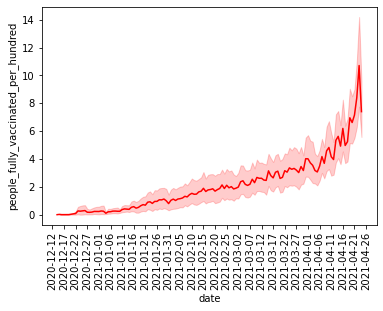

In [ ]:
full = sns.lineplot(data=covid_df_merged.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",color='red')
full.xaxis.set_major_locator(mdates.DayLocator(interval = 5))
plt.xticks(rotation = 90)

plt.show()

We will now plot the graphs to see visualize how many people per hundred are getting vaccinated based on the region, life expectancy, population and GDP.

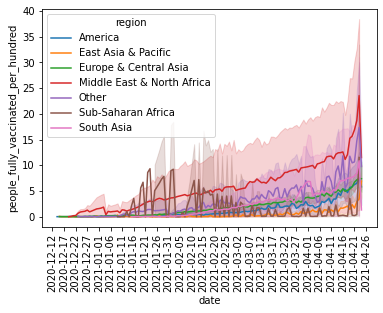

In [ ]:
#Graph by Region

plot_region = sns.lineplot(data=covid_df_merged.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='region',color='red')
plot_region.xaxis.set_major_locator(mdates.DayLocator(interval = 5))
plt.xticks(rotation = 90)

plt.show()

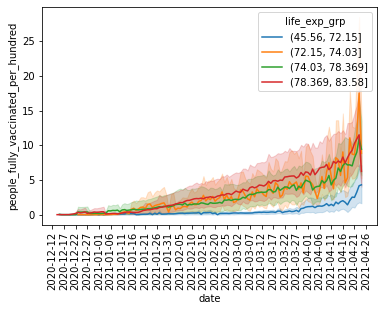

In [ ]:
#Graph by Life Expectancy

covid_df_merged['life_exp_grp'] = pd.qcut(covid_df_merged['life'],q=4)
graph = sns.lineplot(data=covid_df_merged.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='life_exp_grp')
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 5))
plt.xticks(rotation = 90)

plt.show()

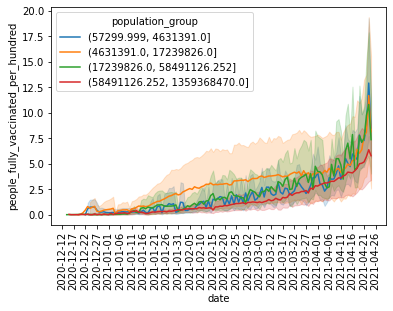

In [ ]:
#Graph by Population

covid_df_merged['population_group'] = pd.qcut(covid_df_merged['population'],q=4)
graph = sns.lineplot(data=covid_df_merged.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='population_group')
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 5))
plt.xticks(rotation = 90)

plt.show()

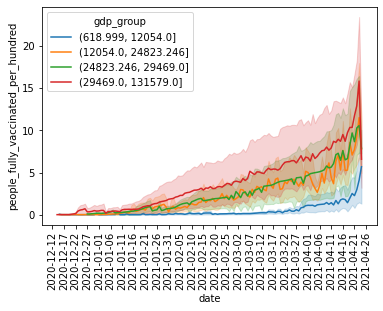

In [ ]:
#Graph by GDP

covid_df_merged['gdp_group'] = pd.qcut(covid_df_merged['gdp'],q=4)
graph = sns.lineplot(data=covid_df_merged.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='gdp_group')
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 5))
plt.xticks(rotation = 90)

plt.show()

In [ ]:
top_10_vacc = list(covid_df_merged[(~covid_df_merged['people_fully_vaccinated_per_hundred'].isna())&(covid_df_merged['date']=='2021-03-28')].sort_values(by='people_fully_vaccinated_per_hundred',ascending=False).head(10)['iso_code'])
top_10_vacc

['GIB', 'ISR', 'ARE', 'MDV', 'CHL', 'USA', 'JEY', 'BHR', 'SRB', 'OWID_WLS']

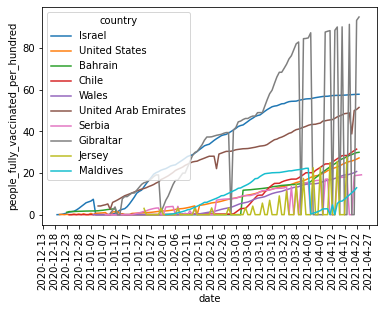

In [ ]:
#Top 10 GDP countries in the world vaccination rates

graph_top10 = sns.lineplot(data=covid_df_merged[covid_df_merged['iso_code'].isin(top_10_vacc)]
                     .sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='country')
graph_top10.xaxis.set_major_locator(mdates.DayLocator(interval = 5))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

# Facebook Prophet Algorithm

Let us now predict when people_vaccinated_per_hundred would potentially reach 100% coverage for certain countries with a new method - the Facebook Prophet algorithm.

We will import the Prophet library here which is an open-source library developed by Facebook and designed for automatic forecasting of univariate time series data.

In [ ]:
from fbprophet import Prophet
def fcast(cntry):
    p = covid_df_merged[covid_df_merged['iso_code'].isin([cntry])].sort_values(by="date")[['date',"people_fully_vaccinated_per_hundred"]]
    p.columns = ['ds', 'y']     # define the model
    model = Prophet()           # fit the model
    model.fit(p)                # define the period for which we want a prediction
    future = list()
    
    for i in range(1, 13):
        date = '2021-%02d' % i
        future.append([date])
    for i in range(1, 13):
        date = '2022-%02d' % i
        future.append([date])    
    future = pd.DataFrame(future)
    future.columns = ['ds']
    future['ds']= pd.to_datetime(future['ds'])
    
    forecast = model.predict(future)   # use the model to make a forecast
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10))   # summarize the forecast
    model.plot(forecast)               # plot forecast
    
    plt.ylim(0, 100)
    n_lower=forecast['yhat_lower'].sub(100).abs().idxmin()
    n_upper=forecast['yhat_upper'].sub(100).abs().idxmin()
    plt.title(cntry 
              + ' forecast of people_fully_vaccinated_per_hundred: 100% expected between ' 
              + forecast[n_upper:n_upper+1]['ds'].iloc[0].strftime('%Y-%m-%d') 
              + ' and ' 
              + forecast[n_lower:n_lower+1]['ds'].iloc[0].strftime('%Y-%m-%d'))
    plt.show()

We will call the function fcast defined in the previous block of code for the top 10 countries, plot when they will reach 100% vaccine coverage. 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper
0 2021-01-01   11.170776  -19.697642   43.209723
1 2021-02-01   13.566500  -17.464718   45.331124
2 2021-03-01   30.648199   -3.044017   64.920151
3 2021-04-01   53.265592   23.593410   87.647223
4 2021-05-01   77.565382   46.748029  109.412498
5 2021-06-01   84.202904   51.814062  116.207536
6 2021-07-01  108.780878   77.543749  142.794313
7 2021-08-01  126.213640   94.911253  157.962886
8 2021-09-01  145.866471  115.233778  179.126061
9 2021-10-01  177.716815  147.644369  208.461541


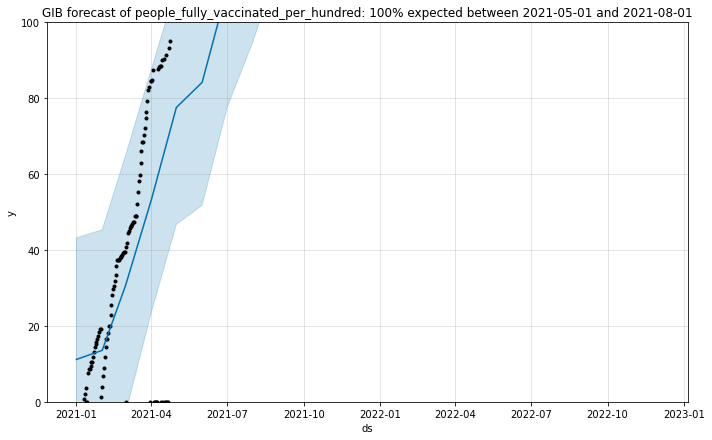

In [ ]:
fcast('GIB')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01   1.970128    0.343495    3.555149
1 2021-02-01  20.548032   18.881015   22.156667
2 2021-03-01  39.940154   38.279206   41.795497
3 2021-04-01  55.628470   54.020511   57.110977
4 2021-05-01  59.750150   57.849651   61.582320
5 2021-06-01  64.413258   56.294865   71.548563
6 2021-07-01  69.291481   49.844588   86.769685
7 2021-08-01  73.696555   39.424491  104.640827
8 2021-09-01  78.390100   27.813065  127.020867
9 2021-10-01  82.977757   14.698682  151.797319


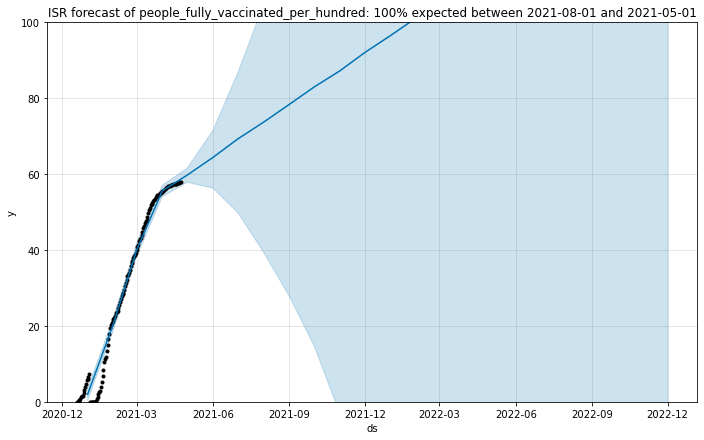

In [ ]:
fcast('ISR')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper
0 2021-01-01    1.018236   -0.600138    2.794581
1 2021-02-01   17.644456   16.056134   19.316929
2 2021-03-01   30.050777   28.351610   31.791358
3 2021-04-01   41.781494   39.939186   43.566635
4 2021-05-01   53.211496   51.482802   54.963819
5 2021-06-01   63.771398   61.783980   65.686456
6 2021-07-01   76.392201   73.411266   79.332053
7 2021-08-01   87.889954   83.375562   92.291878
8 2021-09-01   99.894171   93.196543  106.282439
9 2021-10-01  111.451508  102.529093  119.778009


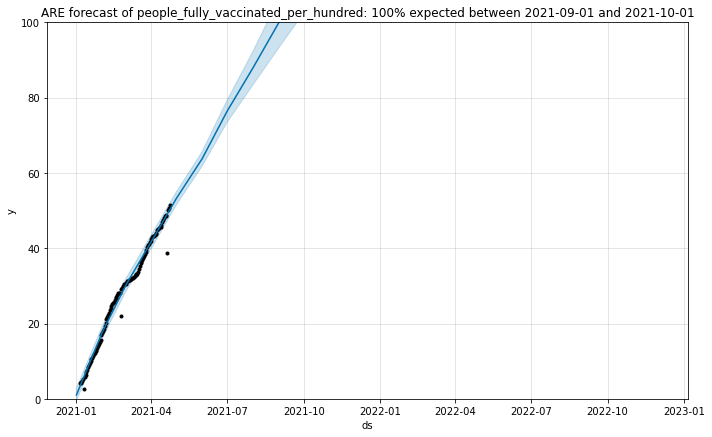

In [ ]:
fcast('ARE')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01   4.415857   -4.277391   13.699825
1 2021-02-01   6.506654   -2.379502   16.003948
2 2021-03-01   9.151291   -0.671602   17.386962
3 2021-04-01  12.756398    3.136030   21.825908
4 2021-05-01  14.068390    4.922556   23.820923
5 2021-06-01  17.186536    8.238304   27.003063
6 2021-07-01  21.327928   11.129966   29.957506
7 2021-08-01  22.808212   13.676885   32.366538
8 2021-09-01  26.623441   16.830169   35.674215
9 2021-10-01  30.150071   20.485121   39.480096


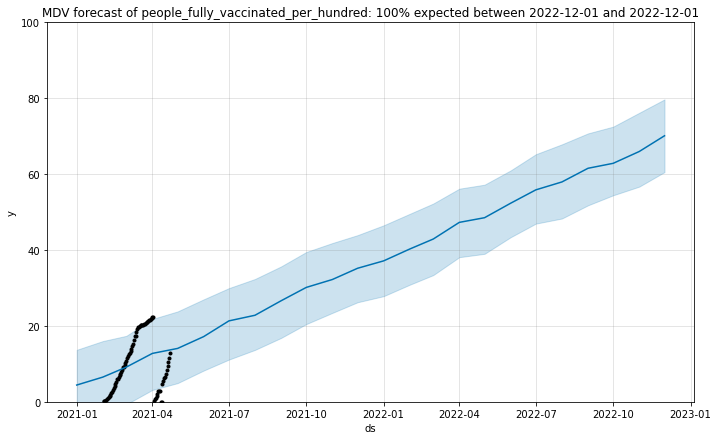

In [ ]:
fcast('MDV')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper
0 2021-01-01    0.197630   -0.085110    0.495198
1 2021-02-01   -0.028180   -0.341409    0.260158
2 2021-03-01    0.439008    0.151899    0.713992
3 2021-04-01   19.725586   19.440989   20.032301
4 2021-05-01   35.973088   35.153250   36.734700
5 2021-06-01   52.935658   44.996990   60.330513
6 2021-07-01   69.568964   50.594994   86.582140
7 2021-08-01   86.107410   52.742421  115.683765
8 2021-09-01  103.435204   54.806563  147.420921
9 2021-10-01  119.982228   54.419744  180.819292


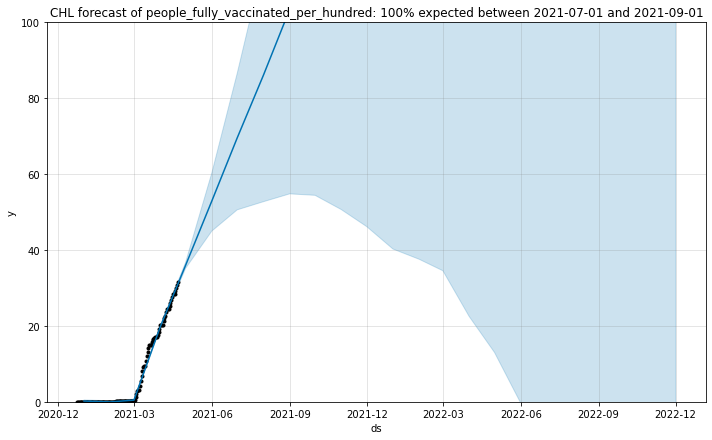

In [ ]:
fcast('CHL')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper
0 2021-01-01    0.322885   -0.243799    0.831510
1 2021-02-01    1.583052    1.033458    2.142688
2 2021-03-01    7.420621    6.864264    7.994434
3 2021-04-01   16.972917   16.413334   17.530280
4 2021-05-01   30.791815   30.190298   31.382810
5 2021-06-01   44.958158   42.964814   46.850099
6 2021-07-01   58.628328   53.790261   63.138989
7 2021-08-01   72.878257   64.377491   80.851964
8 2021-09-01   87.086020   74.540805   99.141611
9 2021-10-01  100.797912   83.764162  117.016514


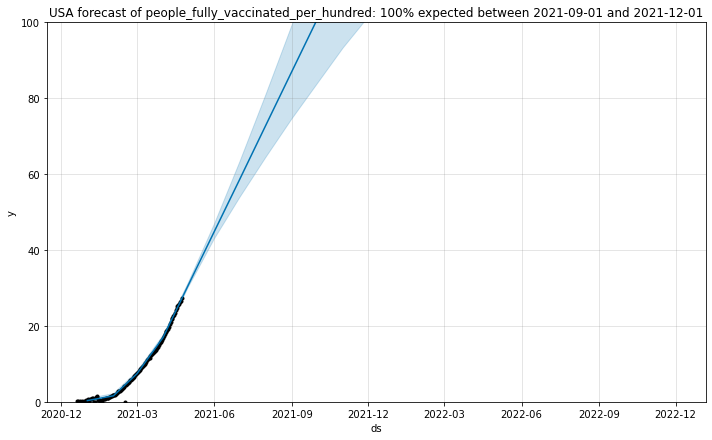

In [ ]:
fcast('USA')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper
0 2021-01-01    0.790035   -1.832056    3.162066
1 2021-02-01    0.448893   -1.899807    2.968469
2 2021-03-01    3.727519    1.277428    6.204985
3 2021-04-01   17.992015   15.689744   20.297416
4 2021-05-01   32.609801   30.177220   35.059652
5 2021-06-01   47.130039   43.595074   50.652903
6 2021-07-01   61.075035   55.376219   66.845969
7 2021-08-01   76.137608   66.810814   85.719892
8 2021-09-01   90.463738   76.577643  104.279124
9 2021-10-01  104.531915   85.873320  123.457383


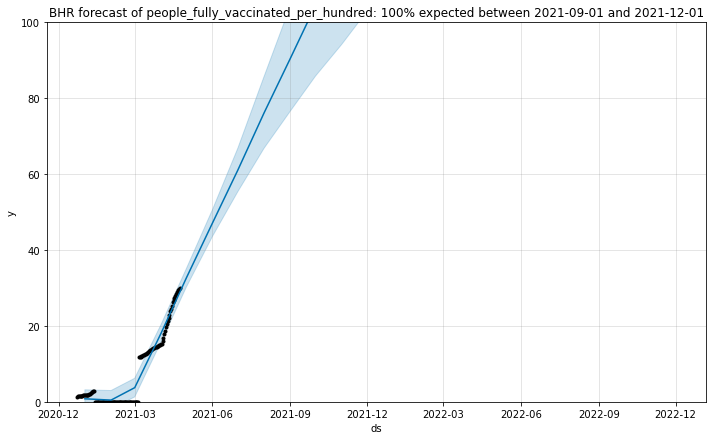

In [ ]:
fcast('BHR')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01  -1.604306   -7.545434    4.009608
1 2021-02-01  -0.711101   -6.781115    4.818422
2 2021-03-01   3.896159   -1.716917    9.409379
3 2021-04-01  11.010342    5.524666   17.022251
4 2021-05-01  15.900670   10.128037   21.602117
5 2021-06-01  20.622609   14.622830   26.331381
6 2021-07-01  25.983937   19.951121   31.898219
7 2021-08-01  31.733994   26.692116   37.787970
8 2021-09-01  38.215547   32.255862   44.167775
9 2021-10-01  43.317139   37.910959   49.191569


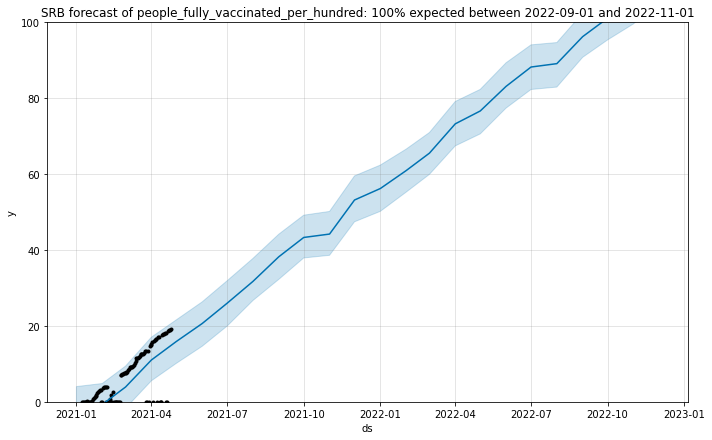

In [ ]:
fcast('SRB')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2021-01-01   0.044331   -0.143672    0.234453
1 2021-02-01  -0.046970   -0.243141    0.148701
2 2021-03-01   3.663144    3.474674    3.855672
3 2021-04-01  14.296077   14.108548   14.490620
4 2021-05-01  22.776832   22.484494   23.057567
5 2021-06-01  31.487530   29.346850   33.721094
6 2021-07-01  40.120303   35.016655   45.276825
7 2021-08-01  48.799778   39.799255   57.922325
8 2021-09-01  57.648670   44.002525   71.153269
9 2021-10-01  66.208154   47.196740   84.479269


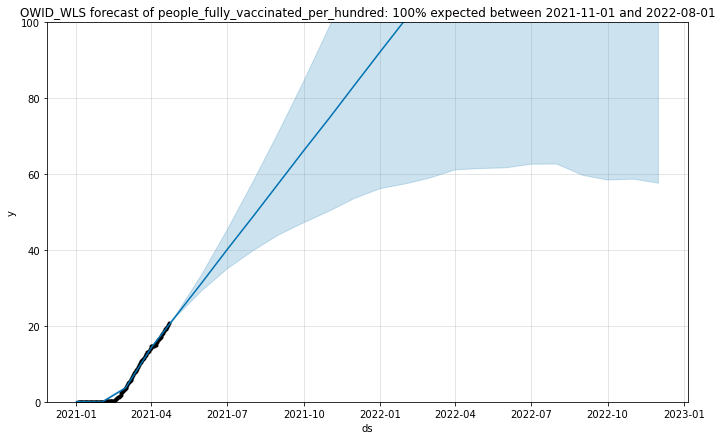

In [ ]:
fcast('OWID_WLS')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper
0 2021-01-01   -0.563255   -2.712776    1.584888
1 2021-02-01   -0.045942   -2.147012    2.141786
2 2021-03-01    0.429914   -1.613373    2.629826
3 2021-04-01   13.001616   10.815159   15.059078
4 2021-05-01   28.380599   26.181422   30.405467
5 2021-06-01   45.482429   42.396843   48.552185
6 2021-07-01   60.739531   54.898456   66.699647
7 2021-08-01   77.465205   68.652057   87.672462
8 2021-09-01   93.540372   79.610719  108.137463
9 2021-10-01  108.735094   90.086675  128.996350


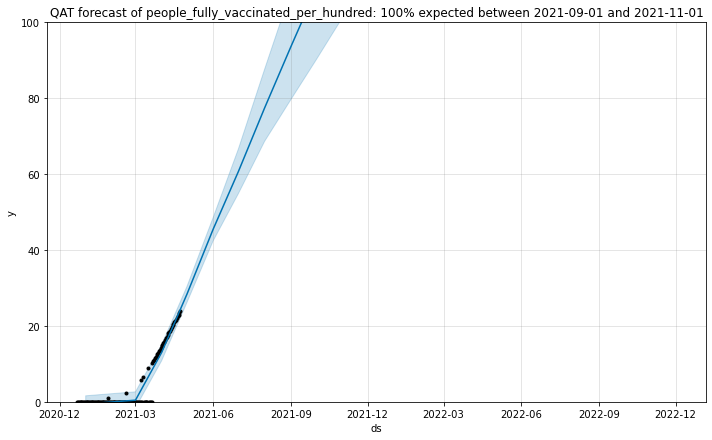

In [ ]:
fcast('QAT')

From the above models we can see that Israel is the country which will be completely vaccinated first based on the population. We have also predicted the months by when the top countries will be vaccinated completely.

# Gaussian Process Using Scikit Learn

Let us use Gaussian Model which is used for regression tasks, where we are predicting a continuous response variable. A GaussianProcessRegressor is applied by specifying an appropriate covariance function, or kernel.

Finding the correlation between the different fields of the dataset

In [ ]:
covid_df_merged.corr()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,Year,fertility,life,population,child_mortality,gdp,gdp-1,gdp_per_capita
total_vaccinations,1.000000,0.819514,0.784636,0.880712,0.913373,0.194524,0.181228,0.160735,0.077675,5.940965e-02,0.000800,6.555440e-02,4.352792e-01,-0.020706,5.027495e-02,0.073514,-0.049673
people_vaccinated,0.819514,1.000000,0.890860,0.692538,0.717539,0.210817,0.240797,0.143388,0.088802,4.634585e-02,0.000250,6.325319e-02,3.021667e-01,-0.012522,6.430841e-02,0.094398,-0.052113
people_fully_vaccinated,0.784636,0.890860,1.000000,0.594551,0.620132,0.207669,0.207328,0.190771,0.086370,5.606432e-02,0.010261,7.415081e-02,1.702115e-01,-0.029149,8.609041e-02,0.065848,-0.037914
daily_vaccinations_raw,0.880712,0.692538,0.594551,1.000000,0.911953,0.116442,0.108352,0.089746,0.057519,6.496119e-02,0.007291,4.637858e-02,4.966545e-01,-0.001132,2.683967e-02,0.068644,-0.048980
daily_vaccinations,0.913373,0.717539,0.620132,0.911953,1.000000,0.109776,0.100879,0.084887,0.052661,8.220563e-02,0.009446,5.074930e-02,6.352551e-01,-0.001077,1.883193e-02,0.076350,-0.058875
total_vaccinations_per_hundred,0.194524,0.210817,0.207669,0.116442,0.109776,1.000000,0.916681,0.937997,0.472171,-1.502003e-01,-0.176262,1.813486e-01,-3.284755e-02,-0.188293,1.424015e-01,0.017385,0.032991
people_vaccinated_per_hundred,0.181228,0.240797,0.207328,0.108352,0.100879,0.916681,1.000000,0.774597,0.483591,-1.932007e-01,-0.206912,1.749582e-01,-3.749603e-02,-0.194380,7.238497e-02,-0.016421,0.040105
people_fully_vaccinated_per_hundred,0.160735,0.143388,0.190771,0.089746,0.084887,0.937997,0.774597,1.000000,0.420492,-7.905563e-02,-0.106013,1.480870e-01,-3.204386e-02,-0.141842,1.379934e-01,0.026279,0.035624
daily_vaccinations_per_million,0.077675,0.088802,0.086370,0.057519,0.052661,0.472171,0.483591,0.420492,1.000000,-3.253082e-01,-0.311868,1.495050e-01,-4.156982e-02,-0.231818,1.318136e-01,-0.072355,0.101632
Year,0.059410,0.046346,0.056064,0.064961,0.082206,-0.150200,-0.193201,-0.079056,-0.325308,1.000000e+00,0.713463,-2.241379e-14,-1.033400e-15,0.323367,-9.461413e-16,0.307515,0.137682


We calculate the predictions for the country India.

In [ ]:
p_df = covid_df_merged[covid_df_merged['iso_code'].isin(['ISR'])].sort_values(by="date")[['date',"people_fully_vaccinated_per_hundred","people_vaccinated_per_hundred"]]

In [ ]:
p_df.reset_index(inplace=True)

In [ ]:
p_df['index'] = p_df['index']-5555

In [ ]:
p_df.tail()

,index,date,people_fully_vaccinated_per_hundred,people_vaccinated_per_hundred
121,657,2021-04-19,57.60,61.90
122,658,2021-04-20,57.67,61.97
123,659,2021-04-21,57.75,62.04
124,660,2021-04-22,57.83,62.09
125,661,2021-04-23,57.85,62.11


In [ ]:
x = p_df['index'].values
y = p_df['people_fully_vaccinated_per_hundred'].values
N = len(y)

Plotting the graph for same

C:\Users\saraf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

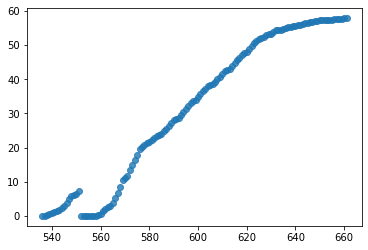

In [ ]:
sns.regplot(x, y, fit_reg=False)

In [ ]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

kernel = ConstantKernel() * Matern(length_scale=0.4,  nu=0.2) + WhiteKernel(noise_level=1)

In [ ]:
x.shape

(126,)

In [ ]:
X = x.reshape(-1, 1)
X.shape

(126, 1)

In [ ]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(X, y)

GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=0.4, nu=0.2) + WhiteKernel(noise_level=1))

In [ ]:
gp.kernel_

21.7**2 * Matern(length_scale=1e+05, nu=0.2) + WhiteKernel(noise_level=1e-05)

In [ ]:
len(np.linspace(550, 665).reshape(-1,1))

50

In [ ]:
x_pred = np.linspace(550, 665).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

C:\Users\saraf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


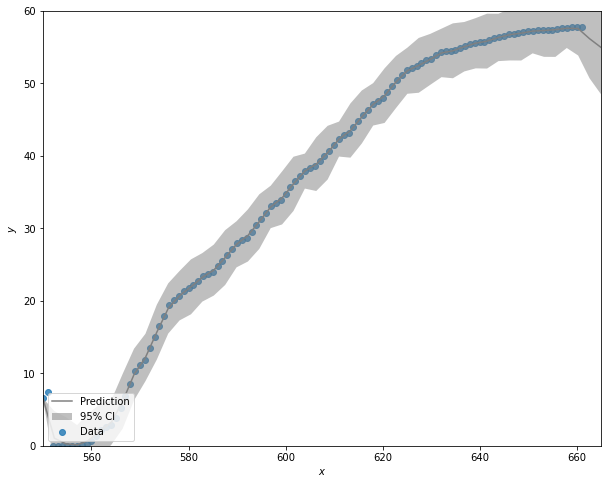

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(x, y, fit_reg=False, label='Data')
plt.plot(x_pred, y_pred, color='grey', label='Prediction')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([y_pred - 2*sigma,
                        (y_pred + 2*sigma)[::-1]]),
         alpha=.5, fc='grey', ec='None', label='95% CI')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(550, 665)
plt.ylim(0, 60)
plt.legend(loc='lower left');

We can see that Israel has vaccinated 60 people per hundred till now. The predicted values seem to go down. This could be because of the factors such as another covid wave or lesser vaccine supply.

 **Random Forest Algorithm**

In [ ]:
p = covid_df_merged[covid_df_merged['iso_code'].isin(['USA'])].sort_values(by="date")[['date',"people_fully_vaccinated_per_hundred"]]

Setting the date as index

In [ ]:
p.set_index('date',inplace=True)

Finding the total number of people fully vaccinated

In [ ]:
p.isna().sum()

people_fully_vaccinated_per_hundred    29
dtype: int64

In [ ]:
p.values

array([[  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [ 0.4 ],
       [ 0.48],
       [  nan],
       [  nan],
       [  nan],
       [ 0.6 ],
       [ 0.65],
       [ 0.72],
       [ 0.82],
       [ 0.91],
       [ 0.96],
       [ 1.  ],
       [ 1.04],
       [ 1.14],
       [ 1.27],
       [ 1.43],
       [ 1.57],
       [ 1.69],
       [ 1.77],
       [ 1.81],
       [ 1.92],
       [ 2.07],
       [ 2.24],
       [ 2.49],
       [ 2.74],
       [ 2.85],
       [ 2.94],
       [ 3.13],
       [ 3.35],
       [ 3.61],
       [ 3.91],
       [ 4.21],
       [  nan],
       [ 4.49],
       [ 4.63],
       [ 4.83],
       [ 5.09],
       [

In [ ]:
import pandas as pd
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [ ]:
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

In [ ]:
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

In [ ]:
def random_forest_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

In [ ]:
p_val = p.values

In [ ]:
train = series_to_supervised(p_val, n_in=30,n_out=1)

In [ ]:
trainX, trainy = train[:, :-1], train[:, -1]

In [ ]:
model = RandomForestRegressor(n_estimators=1000)

In [ ]:
model.fit(trainX, trainy)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
row = p_val[-30:].flatten()

In [ ]:
yhat = model.predict([row])

In [ ]:
print('Input: %s, Predicted: %.3f' % (row, yhat[0]))

Input: [14.18 14.56 14.99 15.43 15.73 15.97 16.33 16.77 17.34 17.9  18.36 18.66
 18.84 19.26 19.8  20.39 21.14 21.72 22.15 22.52 22.93 23.47 24.1  24.66
 25.2  25.52 25.78 26.19 26.68 27.26], Predicted: 26.981


From the above analysis we have estimated that the number of people who are vaccinated fully based on the column people_fully_vaccinated_per_hundred is 29. After performing predictions on the row we find that the prediction for upcoming days is 26.981% i.e 26.98 people out of 100 will be vaccinated. Here we were only able to calculate for a fewer days and hence we use the Facebook prophet algorithm which is a better one.